<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_de_Tensorflow-2.0_Guia_completa_para_el_Nuevo_Tensorflow/blob/master/Colab_4_Construir_una_Red_Neuronal_Convolucional_con_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paso 1: Instalar las dependencias y la configuración del notebook en GPU

In [51]:
#!pip install tensorflow-gpu==2.0.0.alpha0

## Paso 2: Importar las librerías necesarias

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0'

## Paso 3: Pre procesado de datos


### Cargar el dataset  Cifar10

In [53]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [54]:
# Cargar el dataset y divido para el entrenamiento
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalización de las imágenes

In [55]:
X_train = X_train / 255.0

In [56]:
X_train.shape # tiene 4 dimenciones (cantidad, alto, ancho, color)

(50000, 32, 32, 3)

In [57]:
X_test = X_test / 255.0 # para que este entre 0-1

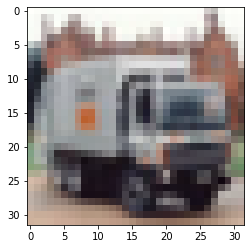

In [58]:
plt.imshow(X_test[11])

In [59]:
y_test[11]

array([9], dtype=uint8)

## Paso 4: Construir una red neuronal convolucional

### Definir el modelo

In [60]:
model = tf.keras.models.Sequential()

### Añadir la primera capa de convolución

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3(no permite hacer la media, ponderacion,convolucion,producto convolucional con la capa de la imagen)
- padding: same (la imagen se autocopleta en la convolucion ) https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow
- Función de Activación: relu
- input_shape: (32, 32, 3)


In [61]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))


### Añadir una segunda capa convolucional y la capa de max-pooling 

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu



In [62]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))


Hyper parámetros de la capa de MaxPool: (Esto reducira mas aun la imagen tomando los valores mas altos o mas significativos)
- pool_size: 2
- strides: 2
- padding: valid

In [63]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


### ¿Qué son los strides?
Es un argumento de la capa de convolución que define el número de píxeles que el kernel puede moverse en cualquier dirección analizando la capa de entrada.


### Añadir la tercera capa convolucional

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu


In [64]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))


###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [65]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [66]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la capa de flattening (Aplanado)

In [67]:
model.add(tf.keras.layers.Flatten())

### Añadir la primera capa fully-connected

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 128
- activation: relu

In [68]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [69]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

### Compilar el modelo

#### sparse_categorical_accuracy
sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [71]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Entrenar el modelo

In [72]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3551 - sparse_categorical_accuracy: 0.5111
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8966 - sparse_categorical_accuracy: 0.6835
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7088 - sparse_categorical_accuracy: 0.7508
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5876 - sparse_categorical_accuracy: 0.7937
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4767 - sparse_categorical_accuracy: 0.8305
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3811 - sparse_categorical_accuracy: 0.8651
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3022 - sparse_categorical_accuracy: 0.8918
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2355 - sparse_categorical_accuracy: 0.9170
Epoch 9/15
1563/1563 [==========

### Evaluar el modelo

In [75]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6387 - sparse_categorical_accuracy: 0.7361


In [76]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7361000180244446
